In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import soundfile as sf
import os
import numpy as np
import scipy as sp
import random
import webrtcvad
import collections
import contextlib
import struct
import audiolazy.lazy_lpc

In [2]:
spoof_audio_dir = '/nas/home/cborrelli/bot_speech/notebook/audio/spoof'
bonafide_audio_dir = '/nas/home/cborrelli/bot_speech/notebook/audio/bonafide'

spoof_audio_files = [o for o in os.listdir(spoof_audio_dir) if o.endswith('.flac')]
bonafide_audio_files = [o for o in os.listdir(bonafide_audio_dir) if o.endswith('.flac')]

In [3]:
def float2pcm(sig, dtype='int16'):
    sig = np.asarray(sig)
    if sig.dtype.kind != 'f':
        raise TypeError("'sig' must be a float array")
    dtype = np.dtype(dtype)
    if dtype.kind not in 'iu':
        raise TypeError("'dtype' must be an integer type")

    i = np.iinfo(dtype)
    abs_max = 2 ** (i.bits - 1)
    offset = i.min + abs_max
    return (sig * abs_max + offset).clip(i.min, i.max).astype(dtype)

In [4]:
def run_vad(data):
    vad = webrtcvad.Vad()
    vad.set_mode(3)
    audio = float2pcm(data)
    raw_samples = struct.pack("%dh" % len(audio), *audio)
    window_duration = 0.03 # duration in seconds
    samples_per_window = int(window_duration * samplerate)
    number_windows = int(np.floor(len(audio) / samples_per_window))
    bytes_per_sample = 2

    segments = []
    for i in np.arange(number_windows):
        raw_frame = raw_samples[i * bytes_per_sample * samples_per_window: 
                                (i+1) * bytes_per_sample * samples_per_window]
        is_speech = vad.is_speech(raw_frame, sample_rate=samplerate)
        segments.append(dict(
           start = i * samples_per_window,
           stop = (i+1) * samples_per_window-1,
           is_speech = is_speech))
        
    old_bool = segments[0]['is_speech']
    new_start = segments[0]['start']
    
    long_segments = []
    for i, segment in enumerate(segments):
        new_bool = segment['is_speech']
        if old_bool == new_bool:
            new_stop = segment['stop']     
        else:
            long_segments.append(dict(
               start = new_start,
               stop = new_stop,
               is_speech = old_bool))
            new_start = segment['start']
            new_stop = segment['stop']
        old_bool = new_bool
        if i == len(segments) - 1:
            long_segments.append(dict(
               start = new_start,
               stop = new_stop,
               is_speech = old_bool))
    return long_segments

In [68]:
len_lpc = [20, 30, 40]


In [77]:
for t in bonafide_audio_files[:1]:
    data, samplerate = sf.read(os.path.join(bonafide_audio_dir, t))
    ipd.Audio(data, rate=samplerate)

    segments = run_vad(data)
    
    ymax = max(data)
    # plot segment identifed as speech
    for ii, segment in enumerate(segments):
        if segment['is_speech']:
            if segment['stop'] - segment['start'] <= int(0.2*samplerate):
                break
            voice = np.asarray(data[segment['start']:segment['stop']])
            
            window_length = int(0.005*samplerate)
            win_number = int(np.floor(len(voice) / window_length))
            res_energy = []
            y_hat = []
            coeff = []
            res = []
            frames = []
            for i in np.arange(win_number):
                frame = voice[i*window_length:(i+1)*window_length]
                coeff_frame = []
                y_hat_frame = []
                res_frame = []
                for l in len_lpc:
                    filt = audiolazy.lazy_lpc.lpc.autocor(frame, l)
                    y_hat_frame.append(list(filt(frame)))
                    coeff_frame.append(filt.numerator)
                    #res_frame.append(frame - list(filt(frame)))
                    #filt = None
                    
                y_hat.append(y_hat_frame)
                res.append(res_frame)
                coeff.append(coeff_frame)
                frames.append(frame)
            
            y_hat = np.asarray(y_hat)
            res = np.asarray(res)
            frames = np.asarray(frames)
            break

            #plt.figure(figsize=(16,8))
            #plt.plot(len_lpc, res_energy)
            #plt.grid()
            #plt.title('Audio file: '+ t + ', fragment: '+ str(ii))


Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:

Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:True
Stability:

In [51]:
res.shape

(479, 4, 48)

In [ ]:
import IPython.display as ipd
ipd.Audio(data, rate=samplerate)

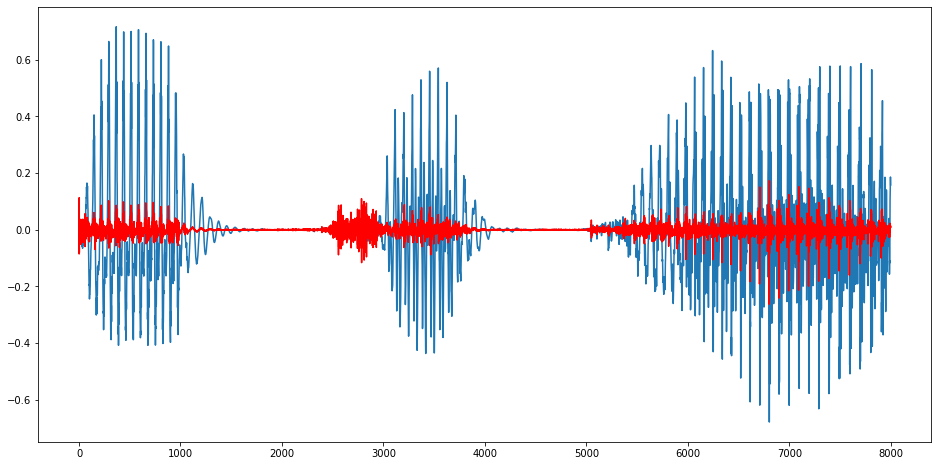

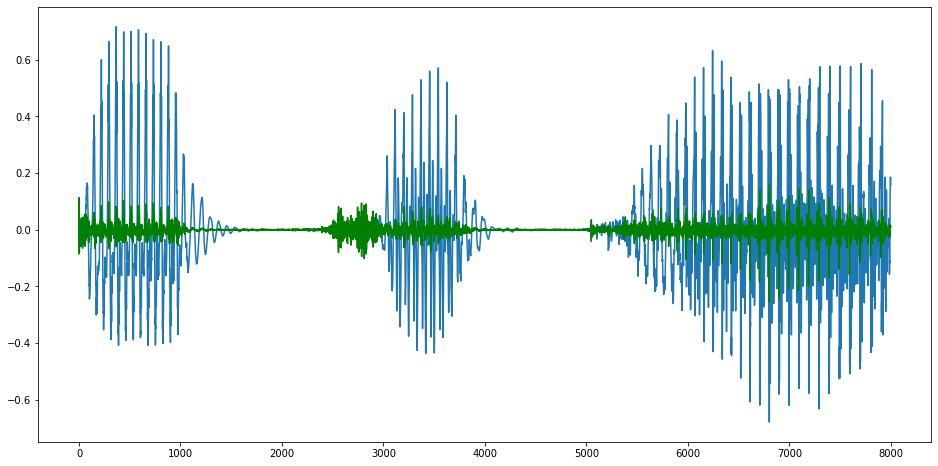

In [71]:
plt.figure(figsize=(16,8))
plt.plot(frames[1,:])
plt.plot(y_hat[1,0,:], color='red')
plt.figure(figsize=(16,8))
plt.plot(frames[1,:])
plt.plot(y_hat[1,2,:], color='green')


In [72]:
np.sum(np.abs(res[1,1,:]))

763.838719770734

In [74]:
np.sum(np.abs(res[1,2,:]))

764.3896316981709

In [67]:
40*(1/samplerate)

0.0025